5) Nell'esercizio delle valutazioni:
- visualizza quali sono i voti medi, massimi e minimi per le due prove di verifica
- considerando l'andamento complessivo della classe e usando i percentili, puoi affermare che l'alunno Di Donato ha fatto una prova migliore nella verifica 1 oppure nella verifica 2? Motiva la risposta.
- è stato più bravo Armadei nella prima verifica o De Luca nella seconda? Motiva la risposta utilizzando i percentili.
- Inoltre , supponi che l'insegnanta abbia deciso di assegnare agli assenti il voto medio preso dagli studenti in quella verifica. Indicare a quali studenti conviene questa scelta (la loro media migliora) e a chi no. 
6)	Crea un file .csv a due colonne: la prima colonna contiene il nome della materia e la seconda contiene la valutazione. Riempi il file con le tue valutazioni di tutte le materie e caricalo in un dataframe di pandas facendo uso della funzione read_csv. Utilizza il metodo groupby() per calcolare il voto medio, il voto massimo e il voto minimo per ciascuna materia. Utilizzando il metodo plot.hist disegna l'istogramma dei tuoi voti nelle varie materie

In [43]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [44]:
voti = pd.read_csv("registro_voti.csv")
voti

Cognome  Valutazione1  Valutazione2
0      adelardi           4.1           3.1
1        adessi           8.0           3.3
2         aggio           5.2           4.6
3       allegri           6.3           3.8
4        amadei           7.2           5.0
5        baglio           NaN           7.0
6      benetton           6.5           4.4
7   bergamaschi           8.5           2.1
8         bosco           5.2           3.3
9        capone           7.7           3.0
10      de luca           6.5           6.1
11        detti           6.0           7.6
12    di donato           5.7           5.7
13      fallaci           NaN           2.6
14      fanucci           8.1           5.6
15   fiorentino           4.2           4.3
16      gentile           2.1           3.1
17     marcello           9.3           6.7
18     montalto           8.6           4.6
19      moretti           9.0           5.3
20         neri           6.5           NaN
21        russo           3.4           3.2
22      scutari           6.5           2.4
23      toscano           5.6           5.6
24    trevisani           2.5           2.2
25      venturi           4.4           6.9
26         zito           6.1           3.7
27        zullo           6.2           7.5

In [45]:
voti.describe()

Valutazione1  Valutazione2
count     26.000000     27.000000
mean       6.130769      4.544444
std        1.913064      1.683936
min        2.100000      2.100000
25%        5.200000      3.150000
50%        6.250000      4.400000
75%        7.575000      5.650000
max        9.300000      7.600000

#voti[voti["Cognome"] == "di donato"].describe()   
Di Donato ha fatto meglio la seconda prova perchè rientra, a livello di voto, al di sopra del 75% degli studenti che hanno effettuato la prova. Mentre nella prima prova Non rientra nemmeno nella metà.

De Luca nella seconda perchè il suo voto rientra al di sopra del 75% dei voti degli altri studenti.

In [42]:
for k in voti[voti["Valutazione1"].isna()]["Valutazione2"]:
    if(k > voti["Valutazione1"].mean()):
        print(f'A {k} non conviene')
    else:
        print(f'A {k} conviene')

A 7.0 non conviene
A 2.6 conviene


In [29]:
for k in voti[voti["Valutazione2"].isna()]["Valutazione1"]:
    if(k > voti["Valutazione2"].mean()):
        print(f'A {k} non conviene')
    else:
        print(f'A {k} conviene')

A 6.5 non conviene


In [59]:
voti["Media"] = voti.mean(axis=1)

voti_modificati = voti.replace(np.nan, voti.mean())
voti_modificati["Media dopo"] = voti_modificati[["Valutazione1", "Valutazione2"]].mean(axis=1)

voti_modificati

Cognome  Valutazione1  Valutazione2  Media  Media dopo
0      adelardi      4.100000      3.100000   3.60    3.600000
1        adessi      8.000000      3.300000   5.65    5.650000
2         aggio      5.200000      4.600000   4.90    4.900000
3       allegri      6.300000      3.800000   5.05    5.050000
4        amadei      7.200000      5.000000   6.10    6.100000
5        baglio      6.130769      7.000000   7.00    6.565385
6      benetton      6.500000      4.400000   5.45    5.450000
7   bergamaschi      8.500000      2.100000   5.30    5.300000
8         bosco      5.200000      3.300000   4.25    4.250000
9        capone      7.700000      3.000000   5.35    5.350000
10      de luca      6.500000      6.100000   6.30    6.300000
11        detti      6.000000      7.600000   6.80    6.800000
12    di donato      5.700000      5.700000   5.70    5.700000
13      fallaci      6.130769      2.600000   2.60    4.365385
14      fanucci      8.100000      5.600000   6.85    6.850000
15   fiorentino      4.200000      4.300000   4.25    4.250000
16      gentile      2.100000      3.100000   2.60    2.600000
17     marcello      9.300000      6.700000   8.00    8.000000
18     montalto      8.600000      4.600000   6.60    6.600000
19      moretti      9.000000      5.300000   7.15    7.150000
20         neri      6.500000      4.544444   6.50    5.522222
21        russo      3.400000      3.200000   3.30    3.300000
22      scutari      6.500000      2.400000   4.45    4.450000
23      toscano      5.600000      5.600000   5.60    5.600000
24    trevisani      2.500000      2.200000   2.35    2.350000
25      venturi      4.400000      6.900000   5.65    5.650000
26         zito      6.100000      3.700000   4.90    4.900000
27        zullo      6.200000      7.500000   6.85    6.850000

In [62]:
print(f'Conviene a:\n{voti_modificati[voti_modificati["Media dopo"]>voti_modificati["Media"]]["Cognome"].values}')
print(f'Non conviene a:\n{voti_modificati[voti_modificati["Media dopo"]<voti_modificati["Media"]]["Cognome"].values}')

Conviene a:
['fallaci']
Non conviene a:
['baglio' 'neri']


In [30]:
miei_voti = pd.read_csv("Miei_voti.csv")
miei_voti

Materia   Voto
0        Ed. Civica  10.00
1        Ed. Civica   8.50
2        Ed. Civica   9.00
3              GPOI   6.50
4              GPOI   8.00
5              GPOI   8.50
6              GPOI   8.50
7              GPOI   8.50
8       Informatica   7.75
9       Informatica   8.00
10      Informatica   8.75
11      Informatica   8.25
12         Italiano   8.50
13         Italiano   8.00
14         Italiano   9.25
15         Italiano   8.00
16         Italiano   7.50
17          Inglese   7.50
18          Inglese   8.50
19          Inglese   8.25
20          Inglese   8.75
21          Inglese   8.50
22       Matematica   5.75
23       Matematica   9.00
24       Matematica   8.25
25       Matematica   8.00
26    Microrobotica   9.00
27    Microrobotica   8.00
28    Microrobotica   8.50
29  Scienze Motorie   8.00
30  Scienze Motorie   9.50
31  Scienze Motorie   9.00
32  Scienze Motorie   9.50
33   Sistemi e Reti   8.00
34   Sistemi e Reti   7.75
35   Sistemi e Reti   7.25
36           Storia  10.00
37           Storia   9.00
38           Storia   9.00
39            TPSIT   9.50
40            TPSIT   8.00
41            TPSIT   9.50
42            TPSIT   8.50

In [31]:
miei_voti[["Materia", "Voto"]].groupby("Materia").max()

Voto
Materia               
Ed. Civica       10.00
GPOI              8.50
Informatica       8.75
Inglese           8.75
Italiano          9.25
Matematica        9.00
Microrobotica     9.00
Scienze Motorie   9.50
Sistemi e Reti    8.00
Storia           10.00
TPSIT             9.50

In [10]:
miei_voti[["Materia", "Voto"]].groupby("Materia").min()

Voto
Materia              
Ed. Civica       8.50
GPOI             6.50
Informatica      7.75
Inglese          7.50
Italiano         7.50
Matematica       5.75
Microrobotica    8.00
Scienze Motorie  8.00
Sistemi e Reti   7.25
Storia           9.00
TPSIT            8.00

In [11]:
miei_voti[["Materia", "Voto"]].groupby("Materia").mean()

Voto
Materia                  
Ed. Civica       9.166667
GPOI             8.000000
Informatica      8.187500
Inglese          8.300000
Italiano         8.250000
Matematica       7.750000
Microrobotica    8.500000
Scienze Motorie  9.000000
Sistemi e Reti   7.666667
Storia           9.333333
TPSIT            8.875000

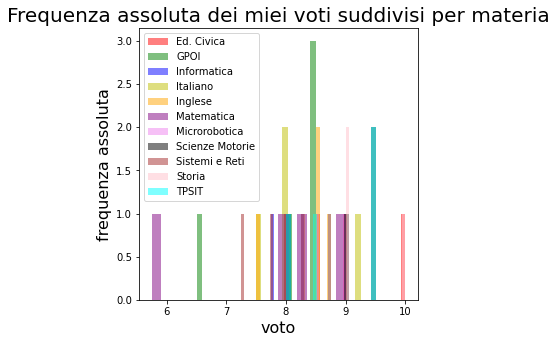

In [75]:
fig, ax = plt.subplots(figsize=(5,5))

colors = ['r', 'g', 'b', 'y', 'orange', 'purple', 'violet',
          'black', 'brown', 'pink', 'cyan']

for materia, c in zip(miei_voti["Materia"].unique(), colors):
    ax.hist(miei_voti["Voto"][miei_voti["Materia"]==materia], 
            bins=20,color=c, label=materia, alpha=0.5)

'''for i, materia in enumerate(miei_voti["Materia"].unique()):
    ax.hist(miei_voti["Voto"][miei_voti["Materia"]==materia], 
            bins=20,color=plt.cm.magma[i], label=materia, alpha=0.5) '''   
    
ax.set_title('Frequenza assoluta dei miei voti suddivisi per materia', fontsize=20)
ax.set_xlabel("voto",fontsize=16)
ax.legend(fontsize=10)
ax.set_ylabel("frequenza assoluta", fontsize=16)
plt.show()